# ***Make a copy of this before using it.***

# Task 1: Warm-Up with Python Basics (20 minutes)

Write a Python function that takes a list of integers as input and returns:
 - The sum of all numbers.
 - The maximum number.
 - A sorted version of the list.


 e.g Test the function with the list `my_list=[3, 1, 4, 1, 5, 9]`

The function

In [ ]:
my_list=[3, 1, 4, 1, 5, 9]

Test the function

In [ ]:
print(sum(my_list))
print(max(my_list))
print(sorted(my_list))

23
9
[1, 1, 3, 4, 5, 9]


# Task 2: Working with Matrices and Tensors (40 minutes)

 - Create two matrices(nested lists or numpy arrays); `mat_a` & `mat_b`, such that you can multiply them and still get a non-scalar output.
 - Perform a Matrix multiplication on them.
 - Convert the matrices into PyTorch tensors.
 - Again multiply them, using the Pytorch way `matmul`.
 - Take the matrices in `mat_a` & `mat_b` as converted into Tensors in **Step 3**, and reshape them into **Vectors**.
 - Add these two **Vectors**.
 -  Multiply those vectors such that you get a square matrix - using either **Numpy** or the **Pytorch** way (using `matmul`).

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import urllib
import torch.nn as nn
import torch.optim as optim

In [ ]:
mat_a = np.array([[1, 2], [3, 4]])
mat_b = np.array([[5, 6], [7, 8]])

In [ ]:
result_np = np.matmul(mat_a, mat_b)
print("Matrix multiplication result (Numpy):")
print(result_np)

Matrix multiplication result (Numpy):
[[19 22]
 [43 50]]


In [ ]:
mat_a_tensor = torch.tensor(mat_a, dtype=torch.float32)
mat_b_tensor = torch.tensor(mat_b, dtype=torch.float32)

In [ ]:
result_tensor = torch.matmul(mat_a_tensor, mat_b_tensor)
print("\nMatrix multiplication result (PyTorch):")
print(result_tensor)


Matrix multiplication result (PyTorch):
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
mat_a_vec = mat_a_tensor.view(-1)
mat_b_vec = mat_b_tensor.view(-1)

In [ ]:
vector_sum = mat_a_vec + mat_b_vec
print("\nSum of vectors:")
print(vector_sum)


Sum of vectors:
tensor([ 6.,  8., 10., 12.])


In [ ]:
result_square_matrix = torch.matmul(mat_a_vec.view(-1, 1), mat_b_vec.view(1, -1))
print("\nResulting square matrix from vector multiplication:")
print(result_square_matrix)


Resulting square matrix from vector multiplication:
tensor([[ 5.,  6.,  7.,  8.],
        [10., 12., 14., 16.],
        [15., 18., 21., 24.],
        [20., 24., 28., 32.]])


# Task 3: Python Functions and Classes (30 minutes)
Goal: Assess your ability to create and use functions and basic OOP concepts.


 - Write a class called Student that has:
  - Attributes: name, age, grades (a list of integers).
  - A method average_grade that calculates and returns the average grade.
 - Create an instance of the Student class with the following data:
  - `name = "Alex", age = 20, grades = [80, 90, 75]  `

 - Print the average grade.


Create the class

In [ ]:
class Student:
    def __init__(self, name, age, grades):
        self.name = name
        self.age = age
        self.grades = grades

    def average_grade(self):
        return sum(self.grades) / len(self.grades)

Create the Class instance

In [ ]:
student = Student(name="Alex", age=20, grades=[80, 90, 75])

Print the average grade.


In [ ]:
print("\nAverage grade:", student.average_grade())


Average grade: 81.66666666666667


# Task 4: Data Preprocessing (30 minutes)


1.   Create a Python function that takes a list of numbers (can contain None values) and:
    - Replaces all None values with the mean of the non-None numbers.
    - Converts the cleaned list into a PyTorch tensor.
2.   Test the function with:
    - `data = [10, None, 20, None, 30]`



Create the function.

In [ ]:
def preprocess_data(data):
    non_none_values = [x for x in data if x is not None]
    mean_value = sum(non_none_values) / len(non_none_values) if non_none_values else 0

    cleaned_data = [x if x is not None else mean_value for x in data]

    tensor_data = torch.tensor(cleaned_data, dtype=torch.float32)

    return tensor_data

Test the function.

In [ ]:
data = [10, None, 20, None, 30]
processed_tensor = preprocess_data(data)

print("\nProcessed Data Tensor:", processed_tensor)


Processed Data Tensor: tensor([10., 20., 20., 20., 30.])


# Task 5: Neural Network Basics (10 minutes).

Please draft a simple Neural Network diagram with the following specs:
 1. Network structure:
    - 2 Input nodes.
    - 1 Hidden Layer with 3 neurons.
    - 2 Output nodes.
 2. Network labelling:
    - Show all the corresponding weights clearly labelled in sucha weight that they can be tracable back to the preceding node/neuron.
    - Show the mathematical operation for only one of the neurons in the hidden layer.


**(Attach a picture of the drawing here - Jupyter/Colab notebooks can attach images)**

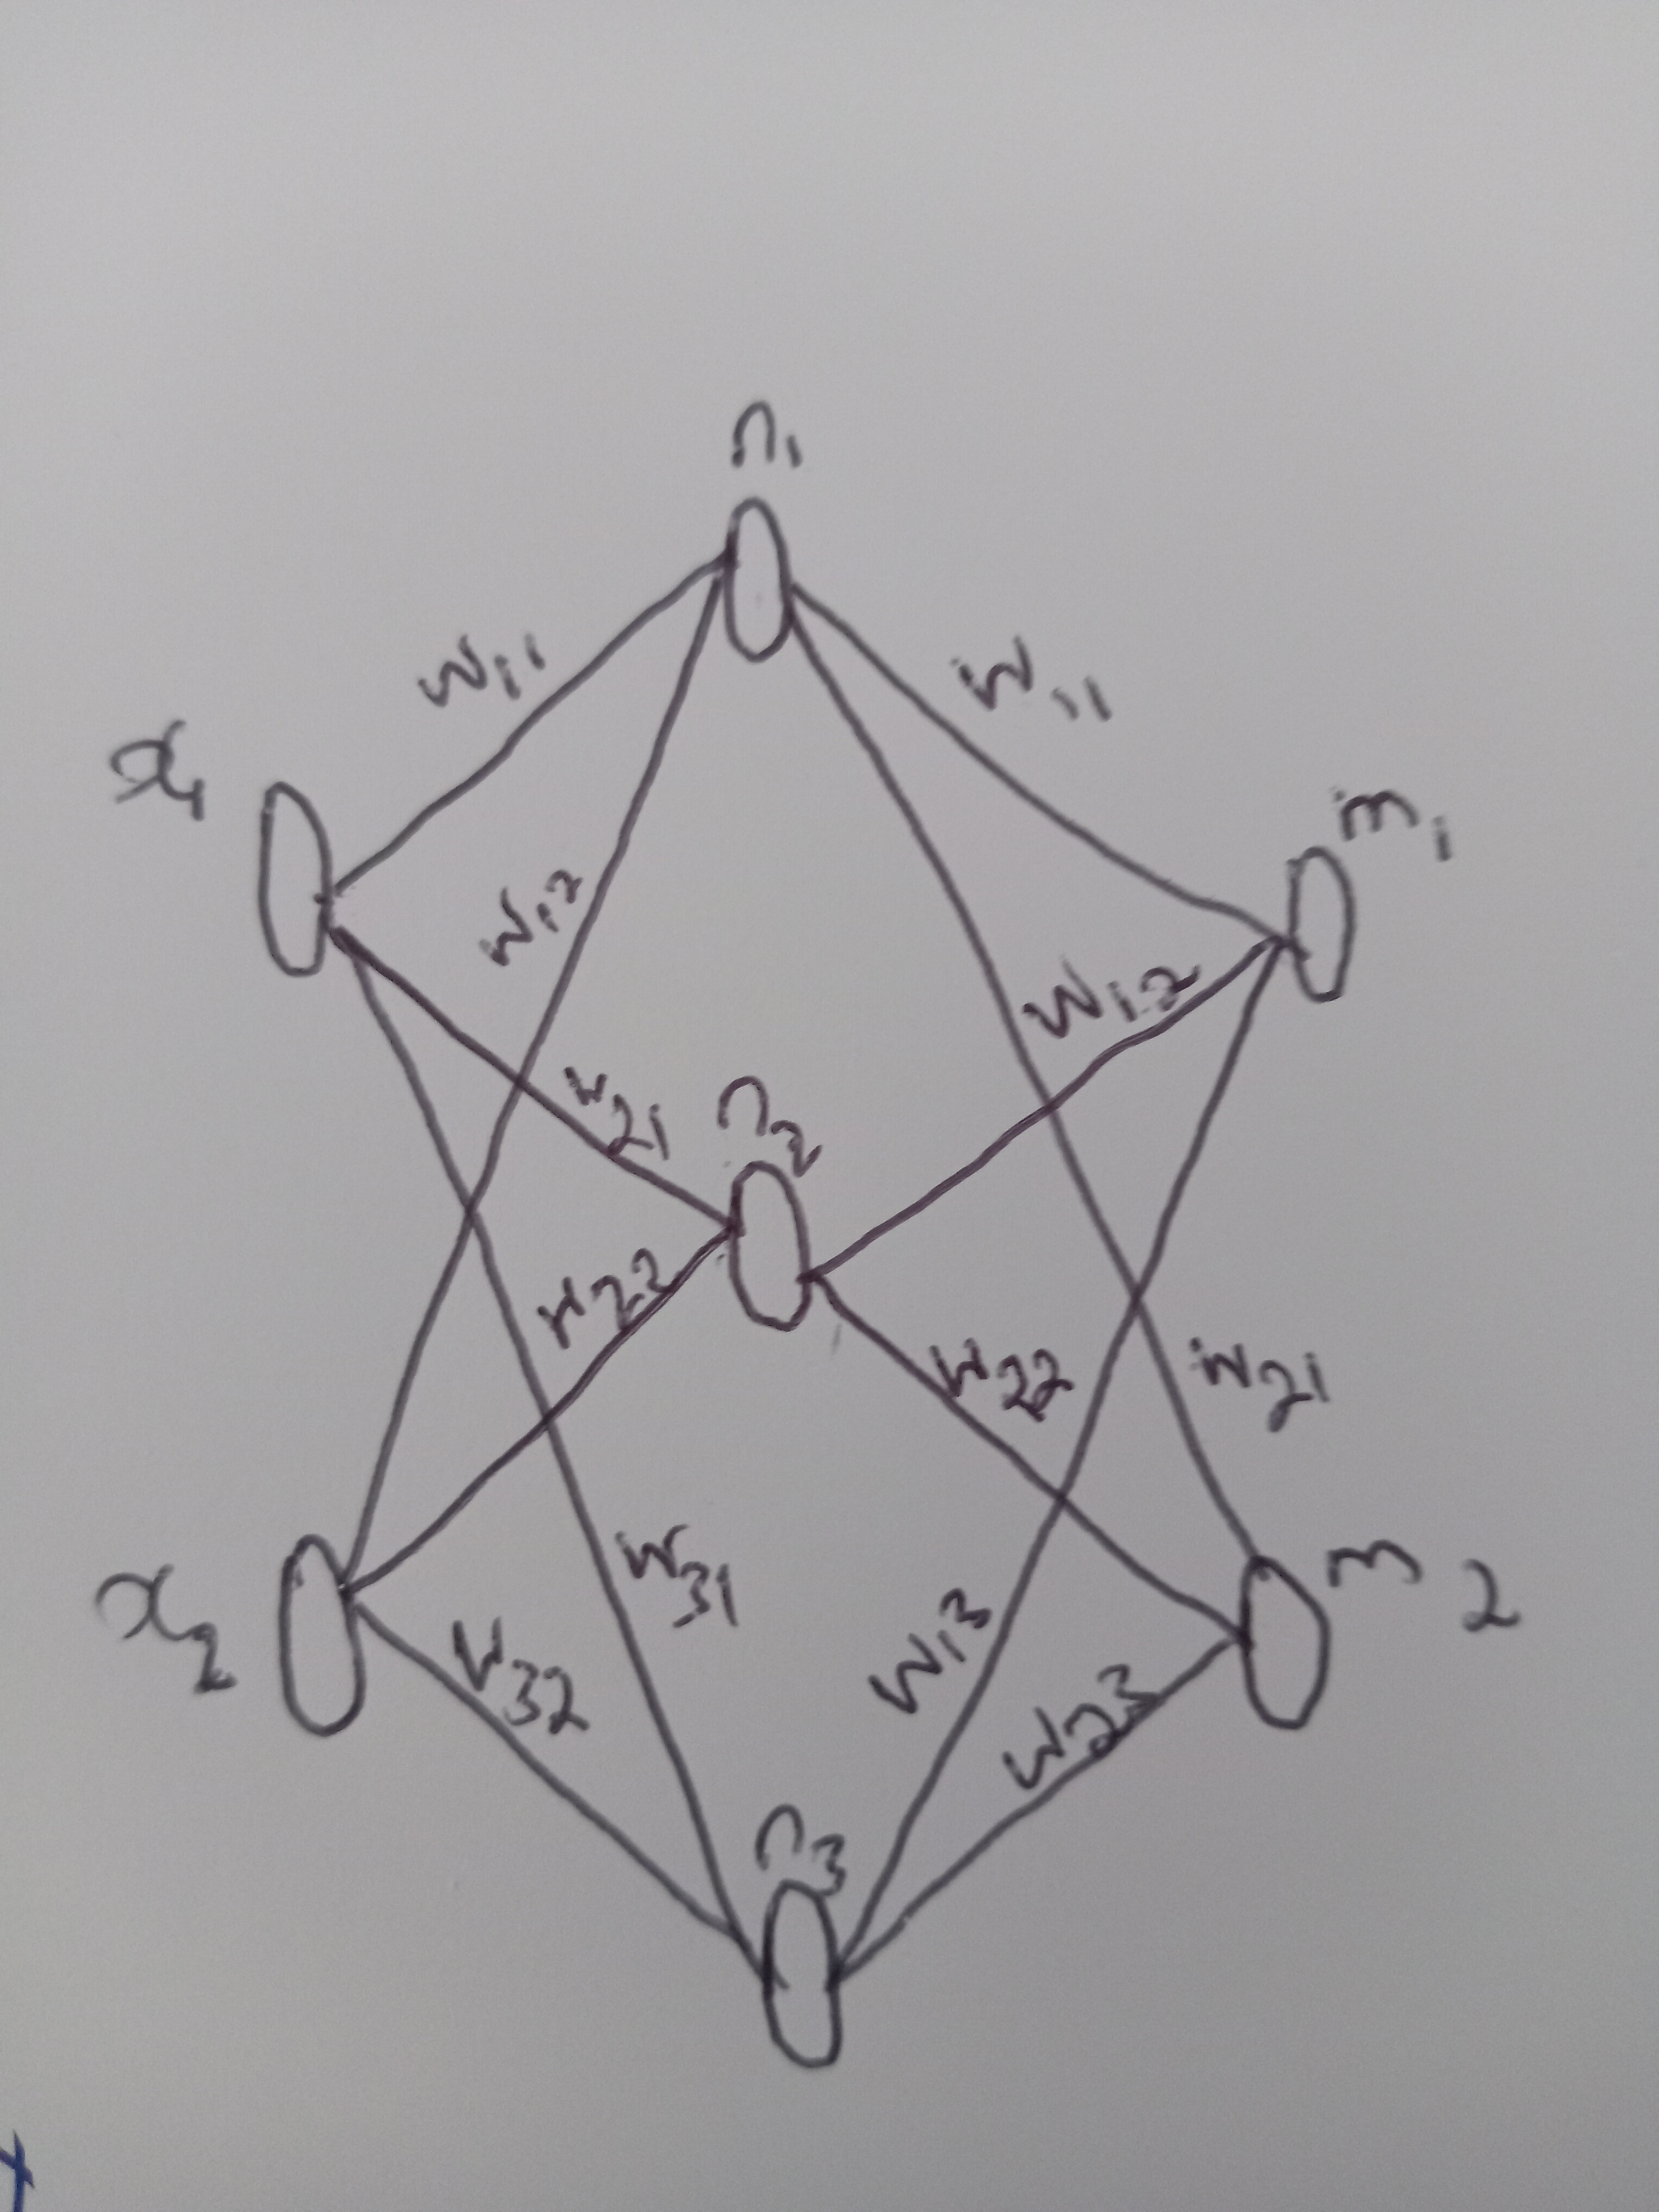

## 5.1 BONUS Task
Implement the above Network in Pytorch, using two approaches of Model Building:
1. Sub-Classing
2. Sequential



---



### Sub-Classing

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 3)
        self.output = nn.Linear(3, 2)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

#### Initialize it and evaluate the model, i.e: Make predictions.


In [ ]:
model_subclass = SimpleNN()
sample_input = torch.tensor([[1.0, 2.0]])
output_subclass = model_subclass(sample_input)
print("\nPredictions (Sub-Classing):", output_subclass)


Predictions (Sub-Classing): tensor([[ 0.0252, -0.3103]], grad_fn=<AddmmBackward0>)


### Sequential

In [ ]:
model_seq = nn.Sequential(
    nn.Linear(2, 3),
    nn.ReLU(),
    nn.Linear(3, 2)
)

#### Initialize it and evaluate the model, i.e: Make predictions.


In [ ]:
sample_input = torch.tensor([[1.0, 2.0]])
output_seq = model_seq(sample_input)
print("\nPredictions (Sequential):", output_seq)


Predictions (Sequential): tensor([[-0.2873,  0.2882]], grad_fn=<AddmmBackward0>)
